# Near-infrared (NIR) spectroscopy

## Description

This Jupyter notebook explores the application of machine learning techniques to predict the Module of Elasticity (MOE) of wood samples using a dataset obtained through near-infrared (NIR) spectroscopy. The goal is to assess the feasibility of leveraging non-destructive and cost-effective NIR measurements as predictors, circumventing the need for the traditional, time-consuming, and expensive MOE testing process.

## Imports

In [386]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import tensorflow as tf
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor

## Prepare dataset

In [387]:
df = pd.read_csv('Dataset.csv')

## Seperate features and target variable

In [388]:
X = df.iloc[:, :-1]  # X1-X692
y = df.iloc[:, -1]   # Module of Elasticity (MOE)

## Drop nulls

In [389]:
X_cleaned = X.dropna()
X_cleaned.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X683,X684,X685,X686,X687,X688,X689,X690,X691,X692
0,0.000068,0.000074,0.000085,0.000094,0.000099,0.000102,0.000098,0.000092,0.000079,0.000057,...,-0.000073,-0.000081,-0.000089,-0.000104,-0.000115,-0.000114,-0.000110,-0.000108,-0.000106,-0.000116
1,0.000065,0.000071,0.000082,0.000091,0.000094,0.000094,0.000086,0.000074,0.000056,0.000033,...,-0.000105,-0.000117,-0.000120,-0.000117,-0.000117,-0.000123,-0.000128,-0.000136,-0.000138,-0.000141
2,0.000077,0.000083,0.000093,0.000100,0.000101,0.000102,0.000096,0.000085,0.000068,0.000044,...,-0.000131,-0.000142,-0.000151,-0.000172,-0.000185,-0.000200,-0.000205,-0.000204,-0.000210,-0.000213
3,0.000074,0.000079,0.000089,0.000097,0.000101,0.000102,0.000097,0.000087,0.000071,0.000049,...,-0.000141,-0.000162,-0.000178,-0.000194,-0.000200,-0.000215,-0.000223,-0.000224,-0.000227,-0.000231
4,0.000078,0.000084,0.000093,0.000102,0.000106,0.000108,0.000102,0.000093,0.000077,0.000054,...,-0.000147,-0.000165,-0.000198,-0.000215,-0.000215,-0.000227,-0.000220,-0.000215,-0.000203,-0.000201


## Remove outliers

In [390]:
Q1 = X_cleaned.quantile(0.25)
Q3 = X_cleaned.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 3.0 * IQR
upper_bound = Q3 + 3.0 * IQR

outliers = ((X_cleaned < lower_bound) | (X_cleaned > upper_bound)).any(axis=1)

X_cleaned = X_cleaned[~outliers]
y_cleaned = y[~outliers]

## Split dataset into training and testing sets

In [391]:
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

## Feature scalling

In [392]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Regular ML Methods without PCA

### Linear/Polynomial regression

In [393]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
y_train_pred = linear_reg.predict(X_train_scaled)
y_test_pred = linear_reg.predict(X_test_scaled)

In [394]:
# Evaluate performance
print("Linear Regression without PCA:")
print("R-Squared (Train):", r2_score(y_train, y_train_pred))
print("R-Squared (Test):", r2_score(y_test, y_test_pred))

Linear Regression without PCA:
R-Squared (Train): 0.8358834579757716
R-Squared (Test): 0.36358342215395467


### Support Vector Regression (SVR)

In [395]:
svr_reg = SVR(kernel='rbf')
svr_reg.fit(X_train_scaled, y_train)
y_train_pred_svr = svr_reg.predict(X_train_scaled)
y_test_pred_svr = svr_reg.predict(X_test_scaled)

In [396]:
# Evaluate performance
print("\nSupport Vector Regression without PCA:")
print("R-Squared (Train):", r2_score(y_train, y_train_pred_svr))
print("R-Squared (Test):", r2_score(y_test, y_test_pred_svr))


Support Vector Regression without PCA:
R-Squared (Train): 0.7125395462228326
R-Squared (Test): 0.6379932939181661


### Decision Tree regression

In [397]:
tree_reg = DecisionTreeRegressor(max_depth=5)
tree_reg.fit(X_train_scaled, y_train)
y_train_pred_tree = tree_reg.predict(X_train_scaled)
y_test_pred_tree = tree_reg.predict(X_test_scaled)

In [398]:
# Evaluate performance
print("\nDecision Tree Regression without PCA:")
print("R-Squared (Train):", r2_score(y_train, y_train_pred_tree))
print("R-Squared (Test):", r2_score(y_test, y_test_pred_tree))


Decision Tree Regression without PCA:
R-Squared (Train): 0.6942989602162637
R-Squared (Test): 0.48458580252962213


## Random Forest without PCA

In [399]:
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=8)
rf_regressor.fit(X_train_scaled, y_train)
y_train_pred_rf = rf_regressor.predict(X_train_scaled)
y_test_pred_rf = rf_regressor.predict(X_test_scaled)

In [400]:
r2_train_rf = r2_score(y_train, y_train_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

print("Random Forest Regression:")
print("R-Squared (Train):", r2_train_rf)
print("R-Squared (Test):", r2_test_rf)

Random Forest Regression:
R-Squared (Train): 0.8851726448022148
R-Squared (Test): 0.6202454970920732


## ANN without PCA

In [401]:
from keras.optimizers import Adam

ann_model_with_pca = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=512, activation='relu', input_dim=X_train.shape[1]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(units=1)
])

ann_model_with_pca.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
ann_model_with_pca.fit(X_train_scaled, y_train, epochs=200, batch_size=32, verbose=0)


def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    print(f"R-squared (Train): {r2_train}")
    print(f"R-squared (Test): {r2_test}")

print("\nArtificial Neural Network (ANN) (Without PCA):")
evaluate_model(ann_model_with_pca, X_train_scaled, y_train, X_test_scaled, y_test)


Artificial Neural Network (ANN) (Without PCA):
12/12 [==============================] - 0s 4ms/step
R-squared (Train): 0.7945381429270439
R-squared (Test): 0.6577798738585565


## Perform PCA

### Plot PC1-PC2

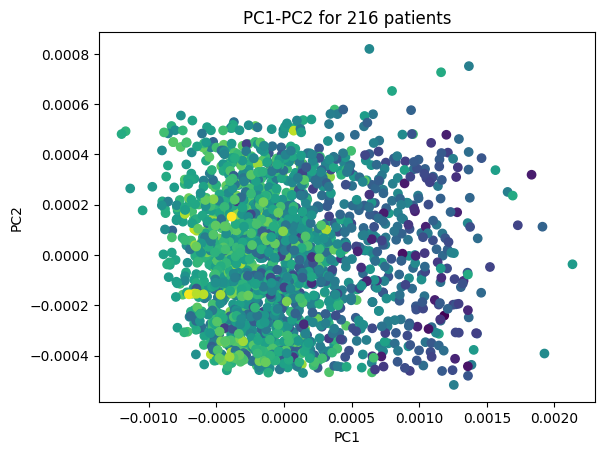

In [402]:
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
pc_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
plt.scatter(pc_df['PC1'], pc_df['PC2'], c=y, cmap='viridis')
plt.title('PC1-PC2 for 216 patients')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### Get top contributing components

In [403]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

Check preserved data

In [404]:
explained_variance_ratio = pca.explained_variance_ratio_
info_preserved = sum(explained_variance_ratio[:10]) * 100
print(f'Percentage of information preserved: {info_preserved:.2f}%')

Percentage of information preserved: 97.56%


## Split dataset into training and testing sets POST PCA

In [405]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

## Feature scalling POST PCA

In [406]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Regular ML Methods with PCA

### Linear/Polynomial regression

In [407]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
y_train_pred = linear_reg.predict(X_train_scaled)
y_test_pred = linear_reg.predict(X_test_scaled)

In [408]:
# Evaluate performance
print("Linear Regression with PCA:")
print("R-Squared (Train):", r2_score(y_train, y_train_pred))
print("R-Squared (Test):", r2_score(y_test, y_test_pred))

Linear Regression with PCA:
R-Squared (Train): 0.5871134406790919
R-Squared (Test): 0.46618078878411995


### Support Vector Regression (SVR)

In [409]:
svr_reg = SVR(kernel='rbf')
svr_reg.fit(X_train_scaled, y_train)
y_train_pred_svr = svr_reg.predict(X_train_scaled)
y_test_pred_svr = svr_reg.predict(X_test_scaled)

In [410]:
# Evaluate performance
print("\nSupport Vector Regression with PCA:")
print("R-Squared (Train):", r2_score(y_train, y_train_pred_svr))
print("R-Squared (Test):", r2_score(y_test, y_test_pred_svr))


Support Vector Regression with PCA:
R-Squared (Train): 0.6749939049964776
R-Squared (Test): 0.5354343471487165


### Decision Tree regression

In [411]:
tree_reg = DecisionTreeRegressor(max_depth=5)
tree_reg.fit(X_train_scaled, y_train)
y_train_pred_tree = tree_reg.predict(X_train_scaled)
y_test_pred_tree = tree_reg.predict(X_test_scaled)

In [412]:
# Evaluate performance
print("\nDecision Tree Regression with PCA:")
print("R-Squared (Train):", r2_score(y_train, y_train_pred_tree))
print("R-Squared (Test):", r2_score(y_test, y_test_pred_tree))


Decision Tree Regression with PCA:
R-Squared (Train): 0.5904620100177393
R-Squared (Test): 0.3905297144523253


### Random Forest regressor

In [416]:
rf_regressor = RandomForestRegressor(n_estimators=50, max_depth=5)
rf_regressor.fit(X_train_scaled, y_train)
y_train_pred_rf = rf_regressor.predict(X_train_scaled)
y_test_pred_rf = rf_regressor.predict(X_test_scaled)

In [417]:
r2_train_rf = r2_score(y_train, y_train_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

print("Random Forest Regression with PCA:")
print("R-Squared (Train):", r2_train_rf)
print("R-Squared (Test):", r2_test_rf)

Random Forest Regression with PCA:
R-Squared (Train): 0.6555637229124727
R-Squared (Test): 0.47839455378997375


## ANN with PCA

In [415]:
ann_model_with_pca = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=256, activation='relu', input_dim=X_train.shape[1]),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=1)
])
ann_model_with_pca.compile(optimizer='adam', loss='mean_squared_error')
ann_model_with_pca.fit(X_train_scaled, y_train, epochs=200, batch_size=32, verbose=0)


def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    print(f"R-squared (Train): {r2_train}")
    print(f"R-squared (Test): {r2_test}")

print("\nArtificial Neural Network (ANN) (With PCA):")
evaluate_model(ann_model_with_pca, X_train_scaled, y_train, X_test_scaled, y_test)


Artificial Neural Network (ANN) (With PCA):
13/13 [==============================] - 0s 3ms/step
R-squared (Train): 0.6206572431816091
R-squared (Test): 0.4817549302619004
